## Local Binary Patterns (LBP)
1. Write a Python function to compute the LBP of a given grayscale image. Use the basic 8-
neighbor LBP method.
2. Your function should output the LBP image, where each pixel is replaced by its
corresponding LBP value.
3. Write a Python function to compute the histogram of the LBP image.
4. Plot the histogram and explain what it represents in terms of the texture features of the
image.
5. Apply your LBP function to at least three different grayscale images (e.g., a natural scene, a
texture, and a face image).
6. Generate and compare the histograms of the LBP images.
7. Discuss the differences in the histograms and what they tell you about the textures of the
different images

In [3]:
#imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

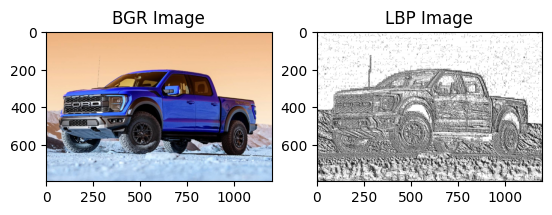

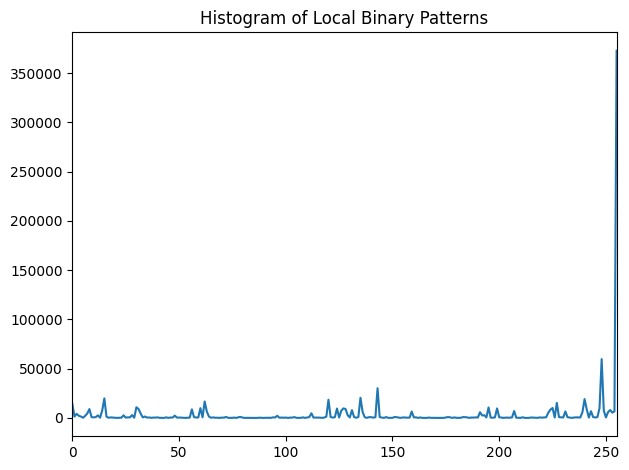

In [27]:
# img = cv2.imread('datasets/images/ford-f150.jpeg',0)

# local Binary Patterns
def get_pixel(img, center, x, y):
      
    new_value = 0
      
    try:
        # If local neighbourhood pixel 
        # value is greater than or equal
        # to center pixel values then 
        # set it to 1
        if img[x][y] >= center:
            new_value = 1
              
    except:
        # Exception is required when 
        # neighbourhood value of a center
        # pixel value is null i.e. values
        # present at boundaries.
        pass
      
    return new_value
   
# Function for calculating LBP
def lbp_calculated_pixel(img, x, y):
   
    center = img[x][y]
   
    val_ar = []
      
    # top_left
    val_ar.append(get_pixel(img, center, x-1, y-1))
      
    # top
    val_ar.append(get_pixel(img, center, x-1, y))
      
    # top_right
    val_ar.append(get_pixel(img, center, x-1, y + 1))
      
    # right
    val_ar.append(get_pixel(img, center, x, y + 1))
      
    # bottom_right
    val_ar.append(get_pixel(img, center, x + 1, y + 1))
      
    # bottom
    val_ar.append(get_pixel(img, center, x + 1, y))
      
    # bottom_left
    val_ar.append(get_pixel(img, center, x + 1, y-1))
      
    # left
    val_ar.append(get_pixel(img, center, x, y-1))
       
    # Now, we need to convert binary
    # values to decimal
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
   
    val = 0
      
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
          
    return val

def lbp_visualize_hist(filename):   
    path = '../datasets/images/' + filename
    img_bgr = cv2.imread(path, 1)
    
    height, width, _ = img_bgr.shape
    
    # We need to convert RGB image 
    # into gray one because gray 
    # image has one channel only.
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    
    # Create a numpy array as 
    # the same height and width 
    # of RGB image
    img_lbp = np.zeros((height, width), np.uint8)
    
    for i in range(0, height):
        for j in range(0, width):
            img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
    
    plt.subplot(1, 2, 1)
    plt.title('BGR Image')
    plt.imshow(img_bgr)
    
    plt.subplot(1, 2, 2)
    plt.title('LBP Image')
    plt.imshow(img_lbp, cmap ="gray")
    plt.show()

    # Creating histogram from LBP image
    hist,bin = np.histogram(img_lbp.ravel(),256,[0,255])
    plt.xlim([0,255])
    plt.plot(hist)
    plt.title('Histogram of Local Binary Patterns')
    plt.tight_layout()
    plt.show()

lbp_visualize_hist('ford-f150.jpeg')


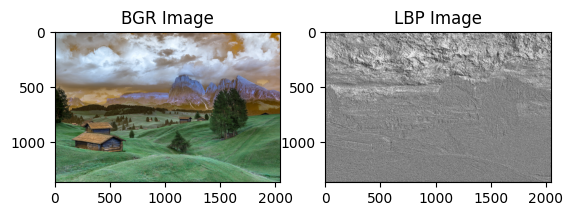

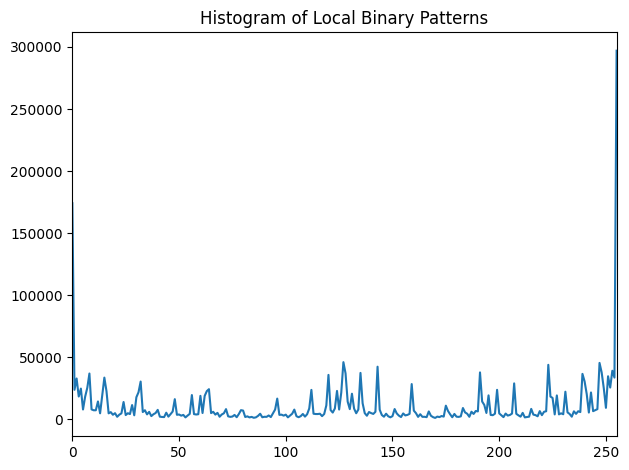

In [28]:
lbp_visualize_hist('seiser.jpg')

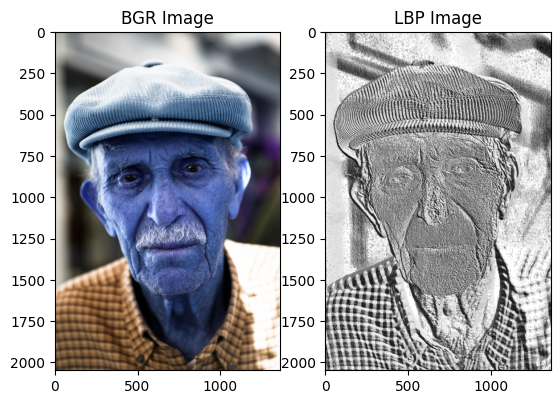

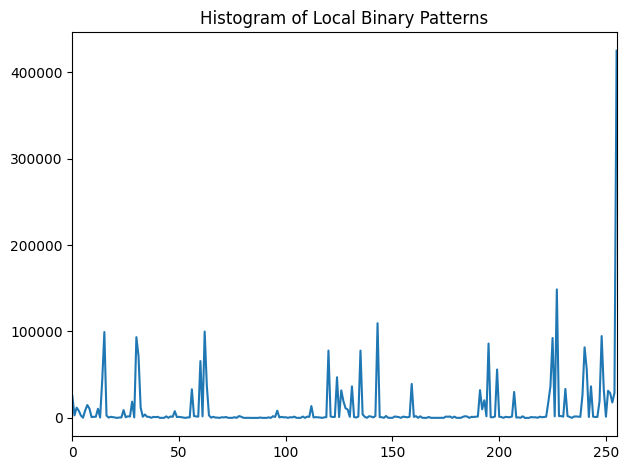

In [29]:
lbp_visualize_hist('oldman.jpg')

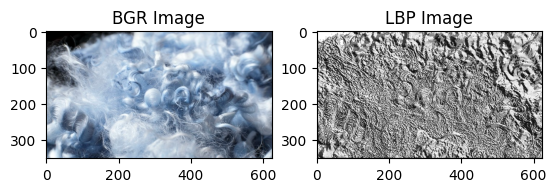

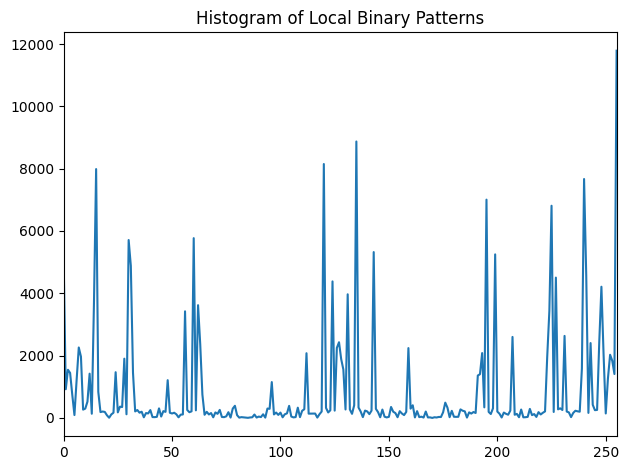

In [30]:
lbp_visualize_hist('wool.jpg')